In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

[-0.13281433 -0.19079727 -0.19583562 ...  0.08588138  0.040711
  0.01581939]
1326600


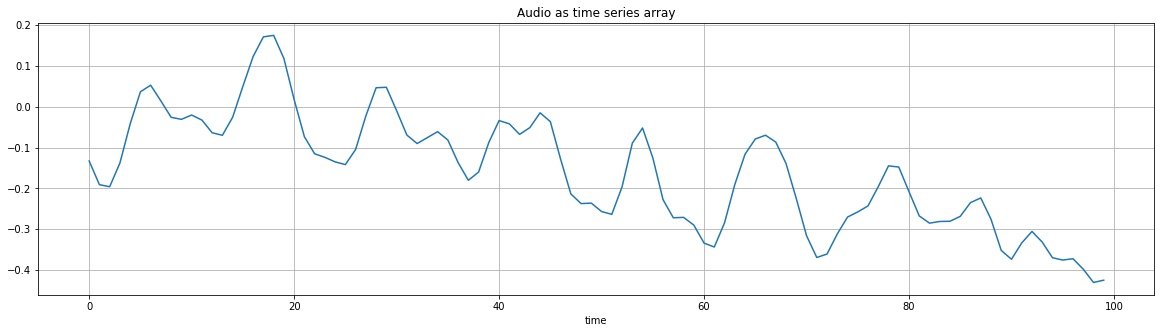

In [2]:
#loading the audio file into timeseriesarray x and samplingrate sr using defalut sr of 22100
audio_data="./data/country/country.00000.wav"
x, sr = librosa.load(audio_data, 44100)
print(x)
print(len(x))
plt.figure(figsize=(20, 5))
plt.plot(x[0:100])
plt.title("country")
plt.xlabel("time")
plt.grid()

[[0.02755102 0.02782313 0.02827664 ... 0.03433107 0.03387755 0.03360544]]
Average ZCR: 0.05742311945354274
Standard ZCR: 0.014662946905030876


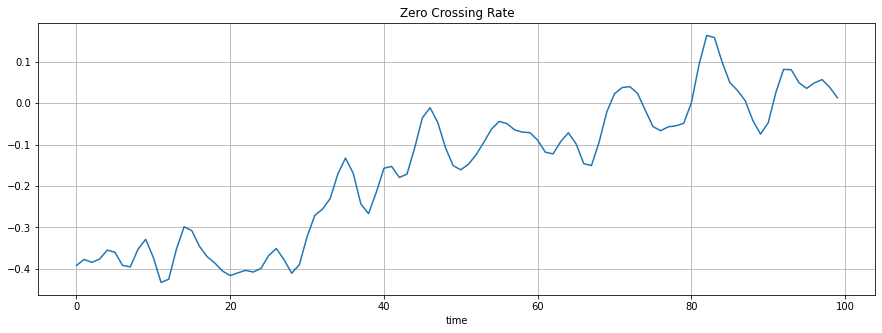

In [3]:
#extracting the zerocrossingrate feature
zcr=librosa.feature.zero_crossing_rate(x,sr)
#print(zcr)
avgzcr = np.mean(zcr)
stdzcr = np.std(zcr)
print("Average ZCR:",avgzcr)
print("Standard ZCR:",stdzcr)
plt.figure(figsize=(15, 5))
plt.plot(x[100:200])
plt.title("Zero Crossing Rate")
plt.xlabel("time")
plt.grid()

[2836.11305969 2662.09643491 2299.58625239 ... 2841.83670722 2711.56600753
 2683.29463012]
Spectral Centroid: 2545.641185857306


Text(0.5, 0, 'time')

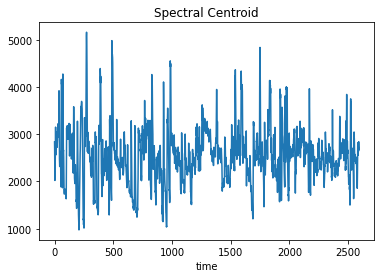

In [4]:
#spectral centroids
spcts = librosa.feature.spectral_centroid(x,sr)[0]
mean_spcts = np.mean(spcts)
#print(spcts)
print("Spectral Centroid:",mean_spcts)
plt.plot(spcts)
plt.title("Spectral Centroid")
plt.xlabel("time")

[7149.0234375  6718.359375   5189.50195312 ... 6524.56054688 6416.89453125
 6459.9609375 ]
Mean Spectral Roll off: 5719.732157389323
Standard Spectral Roll off: 1388.2071374355385


Text(0.5, 0, 'time')

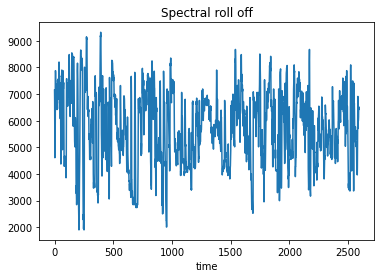

In [5]:
#spectral roll off
sprf = librosa.feature.spectral_rolloff(x,sr)[0]
mean_sprf = np.mean(sprf)
std_sprf = np.std(sprf)
#print(sprf)
print("Mean Spectral Roll off:",mean_sprf)
print("Standard Spectral Roll off:",std_sprf)
plt.plot(sprf)
plt.title("Spectral roll off")
plt.xlabel("time")

[[-1.16872406e+02 -1.35673584e+02 -1.57890869e+02 ... -7.59784775e+01
  -7.36527252e+01 -7.43657150e+01]
 [ 1.31746216e+02  1.49677856e+02  1.54517975e+02 ...  1.80475906e+02
   1.85350449e+02  1.87395584e+02]
 [-3.29321632e+01 -4.59342003e+01 -5.46598282e+01 ... -8.28197327e+01
  -7.66640625e+01 -7.12769318e+01]
 ...
 [-8.72740173e+00 -6.16161251e+00 -9.28700328e-01 ... -2.45960236e-01
  -2.83371639e+00 -3.88698268e+00]
 [-5.17384815e+00 -4.54815388e+00 -2.77169418e+00 ...  6.88170958e+00
   3.57780147e+00  7.43312073e+00]
 [-7.92415905e+00 -1.03613796e+01 -1.45004082e+01 ... -4.55510616e-03
  -2.12354589e+00  1.36805081e+00]]
(20, 2592)


Text(0.5, 0, 'time')

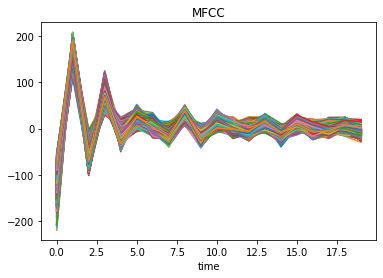

In [6]:
#Mel-Frequency Cepstral Coefficients
mfcc = librosa.feature.mfcc(x,sr)
#print(mfcc)
print(mfcc.shape)
plt.plot(mfcc)
plt.title("MFCC")
plt.xlabel("time")

[3535.37617174 3292.69977038 2762.868498   ... 2736.42440619 2778.59239155
 2881.98728163]
(2592,)


Text(0.5, 0, 'time')

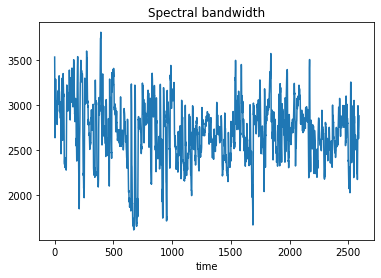

In [7]:
#spectral bandwidth
spbw = librosa.feature.spectral_bandwidth(x,sr)[0]
#print(spbw)
print(spbw.shape)
plt.plot(spbw)
plt.title("Spectral bandwidth")
plt.xlabel("time")

(12, 2592)
0.49617803


Text(0.5, 0, 'time')

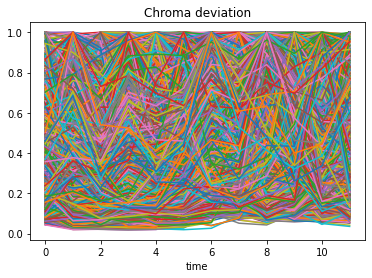

In [8]:
#Chroma deviation
chstft = librosa.feature.chroma_stft(x,sr)
print(chstft.shape)
print(np.mean(chstft))
plt.plot(chstft)
plt.title("Chroma deviation")
plt.xlabel("time")

In [9]:
#populating headers
headers = 'filename zcr_mean zcr_std spectral_centroid mean_spectral_rolloff std_spectral_rolloff spectral_bandwidth '
for index in range(1, 13):
    headers += f' chroma{index}'
for index in range(1, 21):
    headers += f' mfcc{index}'
headers += ' genre'
headers = headers.split()
print(headers)

['filename', 'zcr_mean', 'zcr_std', 'spectral_centroid', 'mean_spectral_rolloff', 'std_spectral_rolloff', 'spectral_bandwidth', 'chroma1', 'chroma2', 'chroma3', 'chroma4', 'chroma5', 'chroma6', 'chroma7', 'chroma8', 'chroma9', 'chroma10', 'chroma11', 'chroma12', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'genre']


In [12]:
#storing headers into csv
import csv
file = open('mycsv_original_chroma_10genre.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(headers)

In [13]:
#storing values into csv
import os
music_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for genre in music_genres:
    for music_file in os.listdir(f'./data/genres_original/{genre}'):
        audio_data = f'./data/genres_original/{genre}/{music_file}'
        x, sr = librosa.load(audio_data, mono=True)
        zcr=librosa.feature.zero_crossing_rate(x,sr)
        spcts = librosa.feature.spectral_centroid(x,sr)[0]
        sprf = librosa.feature.spectral_rolloff(x,sr)[0]
        mfcc = librosa.feature.mfcc(y=x, sr=sr)  
        spbw = librosa.feature.spectral_bandwidth(x,sr)[0]
        chstft = librosa.feature.chroma_stft(x,sr)
        feature_data = f'{music_file} {np.mean(zcr)} {np.std(zcr)} {np.mean(spcts)} {np.mean(sprf)} {np.std(sprf)} {np.mean(spbw)} '
        for c in chstft:
            feature_data += f' {np.mean(c)}'
        for m in mfcc:
            feature_data += f' {np.mean(m)}'
        feature_data += f' {genre}'
        file = open('mycsv_original_chroma_10genre.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(feature_data.split())